In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [94]:
def calc(n=100, f=np.cos):
    A_start = 5
    B_start = 0    
    d_x = np.linspace(-np.pi/2, +np.pi/2, n)
    h = d_x[1] - d_x[0]
    d = f(d_x)
    x = np.empty(n)
    a = np.ones(n) / (h**2)
    b = np.ones(n)*(-2 / h**2)
    c = np.ones(n) / (h**2)
    a[0] = 0
    b[0] = 1
    c[0] = 0
    a[-1] = 0
    b[-1] = 1/h
    a[-1] = -1/h
    d[0] = A_start
    d[-1] = B_start
    
    for i in range(1, n):
        w = a[i]/b[i-1]
        b[i] -= w*c[i-1]
        d[i] -= w*d[i-1]
    x[n-1] = d[n-1] / b[n-1]
    for i in range(n - 2, -1, -1):
        x[i] = (d[i] - c[i]*x[i+1])/b[i]
    return x, d_x

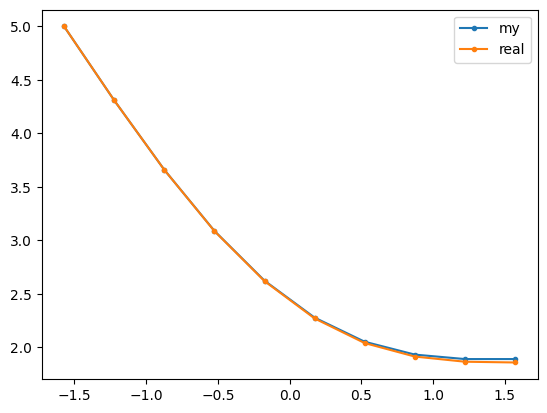

In [95]:
A_r = B_start - 1
B_r = A_start+np.pi/2*A_r
x, d_x = calc(n=10)
real = -np.cos(d_x) + A_r*d_x + B_r
plt.plot(d_x, x, marker=".", label="my")
plt.plot(d_x, real, marker=".", label="real")
plt.legend()
plt.show()

In [93]:
x1, d_x1 = calc(n=10)
real1 = -np.cos(d_x1) + A_r*d_x1 + B_r
error_1 = np.abs(real1-x1)
x2, d_x2 = calc(n=100)
real2 = -np.cos(d_x2) + A_r*d_x2 + B_r
error_2 = np.abs(real2-x2)
print(np.max(error_1)/np.max(error_2))

121.24440481439451


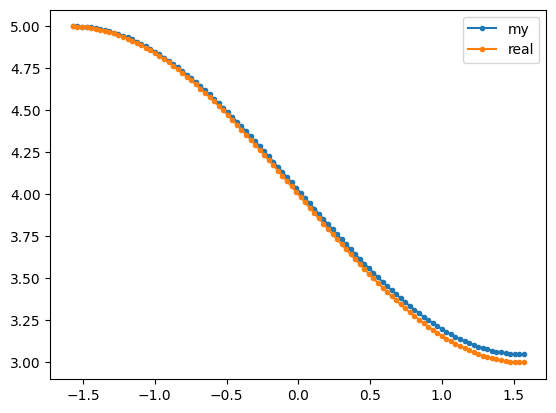

In [108]:
A_r = B_start
B_r = A_start-1-A_r*np.pi/2
x, d_x = calc(n=100, f=np.sin)
real = -np.sin(d_x) + A_r*d_x + B_r
plt.plot(d_x, x, marker=".", label="my")
plt.plot(d_x, real, marker=".", label="real")
plt.legend()
plt.show()

In [107]:
x1, d_x1 = calc(n=10, f=np.sin)
real1 = -np.sin(d_x1) + A_r*d_x1 + B_r
error_1 = np.abs(real1-x1)
x2, d_x2 = calc(n=100, f=np.sin)
real2 = -np.sin(d_x2) + A_r*d_x2 + B_r
error_2 = np.abs(real2-x2)
print(np.max(error_1)/np.max(error_2))

10.625877639279906
